# Importing libraries for our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv(r"E:\project for portfolio\website engagement analysis\website engagement.csv",header=1)
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


# Making the first Row of dataframe as header

In [3]:
# # data.rename(columns=data.iloc[0], inplace = True)
# # data.drop(0,inplace = True)
# # data.head()
# new_header = data.iloc[0]
# data = data[1:]
# data.columns = new_header
# data.reset_index(drop = True,inplace = True) #reset_index is used because dataframe 1st row was shifted upward to make it into header
# data.head()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

# Grouping the data to check when and from where the mostly traffic comes from

In [5]:
data["Date + hour (YYYYMMDDHH)"] = pd.to_datetime(data["Date + hour (YYYYMMDDHH)"],format = "%Y%m%d%H")
grouped_data = data.groupby(data["Session primary channel group (Default channel group)"]).agg({"Users":"sum","Sessions":"sum"})
# grouped_data.index = pd.to_datetime(grouped_data.index,format="%d%m%Y%H")
print("no. of unique values in index column of dataframe: ",grouped_data.index.nunique())
grouped_data.head()

no. of unique values in index column of dataframe:  7


,Users,Sessions
Session primary channel group (Default channel group),,
Direct,30042,37203
Email,2,3
Organic Search,28387,33372
Organic Social,47572,60627
Organic Video,123,141


In [6]:
grouped_data = data.groupby(data["Date + hour (YYYYMMDDHH)"]).agg({"Users":"sum","Sessions":"sum"})
# grouped_data.index = pd.to_datetime(grouped_data.index,format="%d%m%Y%H")
print("no. of unique values in index column of dataframe: ",grouped_data.index.nunique())
grouped_data.head()

no. of unique values in index column of dataframe:  672


,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102


In [7]:
data.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313


In [8]:
grouped_data.columns.tolist()

['Users', 'Sessions']

In [9]:
duplicated = data["Users"].duplicated()==True
data[duplicated].head(30)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
6,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014
10,Organic Social,2024-05-03 22:00:00,151,196,125,13.683673,0.827815,4.678571,0.637755,917
14,Organic Social,2024-04-26 21:00:00,140,199,82,13.758794,0.585714,4.040201,0.412060,804
22,Organic Social,2024-04-13 22:00:00,130,157,69,28.515924,0.530769,4.286624,0.439490,673
23,Organic Social,2024-04-15 13:00:00,130,157,86,44.840764,0.661538,4.636943,0.547771,728
24,Organic Social,2024-04-30 15:00:00,130,171,97,71.245614,0.746154,5.573099,0.567251,953
26,Organic Social,2024-05-02 22:00:00,129,148,86,29.932432,0.666667,4.675676,0.581081,692
28,Organic Social,2024-04-26 10:00:00,128,178,81,36.033708,0.632812,4.353933,0.455056,775
30,Organic Social,2024-04-17 12:00:00,127,152,88,59.664474,0.692913,5.309211,0.578947,807
32,Organic Social,2024-04-25 18:00:00,124,154,72,63.597403,0.580645,4.759740,0.467532,733


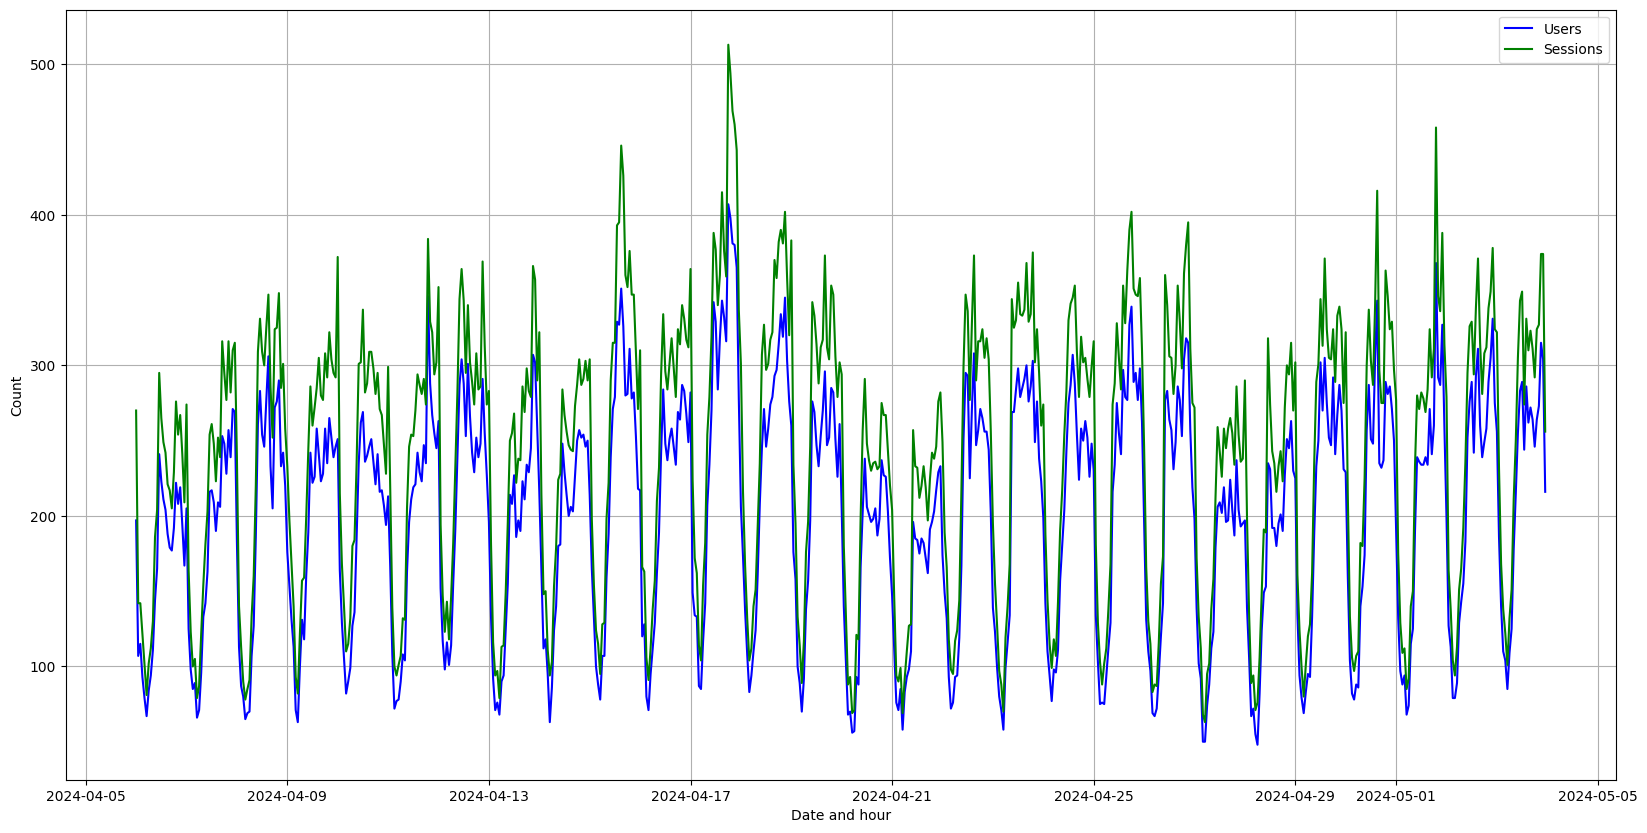

In [10]:
# plotting the aggregate users and sessions over time
plt.figure(figsize=(20,10))
plt.plot(grouped_data.index,grouped_data["Users"],label = "Users",color = "blue")
plt.plot(grouped_data.index,grouped_data["Sessions"],label = "Sessions",color = "green")
plt.xlabel("Date and hour")
plt.ylabel("Count")
plt.grid()
plt.legend()
plt.show()

In [11]:
engagement_metrics = data.groupby("Date + hour (YYYYMMDDHH)").agg({"Average engagement time per session": 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})
""" Average engagement time per session -> total No. of users who visited the website during a time period(i.e 1 hour in this case)/total count of that session during the period
Engaged Sessions per user = total no. of sessions during the time period/total no. of users count during the period
Events per Session means -> "Events are actions that users take on your site, like downloading a resource, clicking a link, submitting a form, and playing a video.
Event tracking measures specific events — the unique actions you want visitors to take on your site.
Event tracking is important because each business has unique needs. While there are website engagement metrics that every website can use, there’s no "one" most important metric. 
Event tracking metrics can help you focus on the specific website actions that drive your business growth."""
engagement_metrics.head(30)

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964
2024-04-06 05:00:00,43.504464,0.684028,3.817460,0.566468
2024-04-06 06:00:00,77.139893,0.535043,3.997571,0.444357
2024-04-06 07:00:00,40.748782,0.546351,5.287865,0.478130
2024-04-06 08:00:00,37.742902,0.640114,4.688568,0.551530


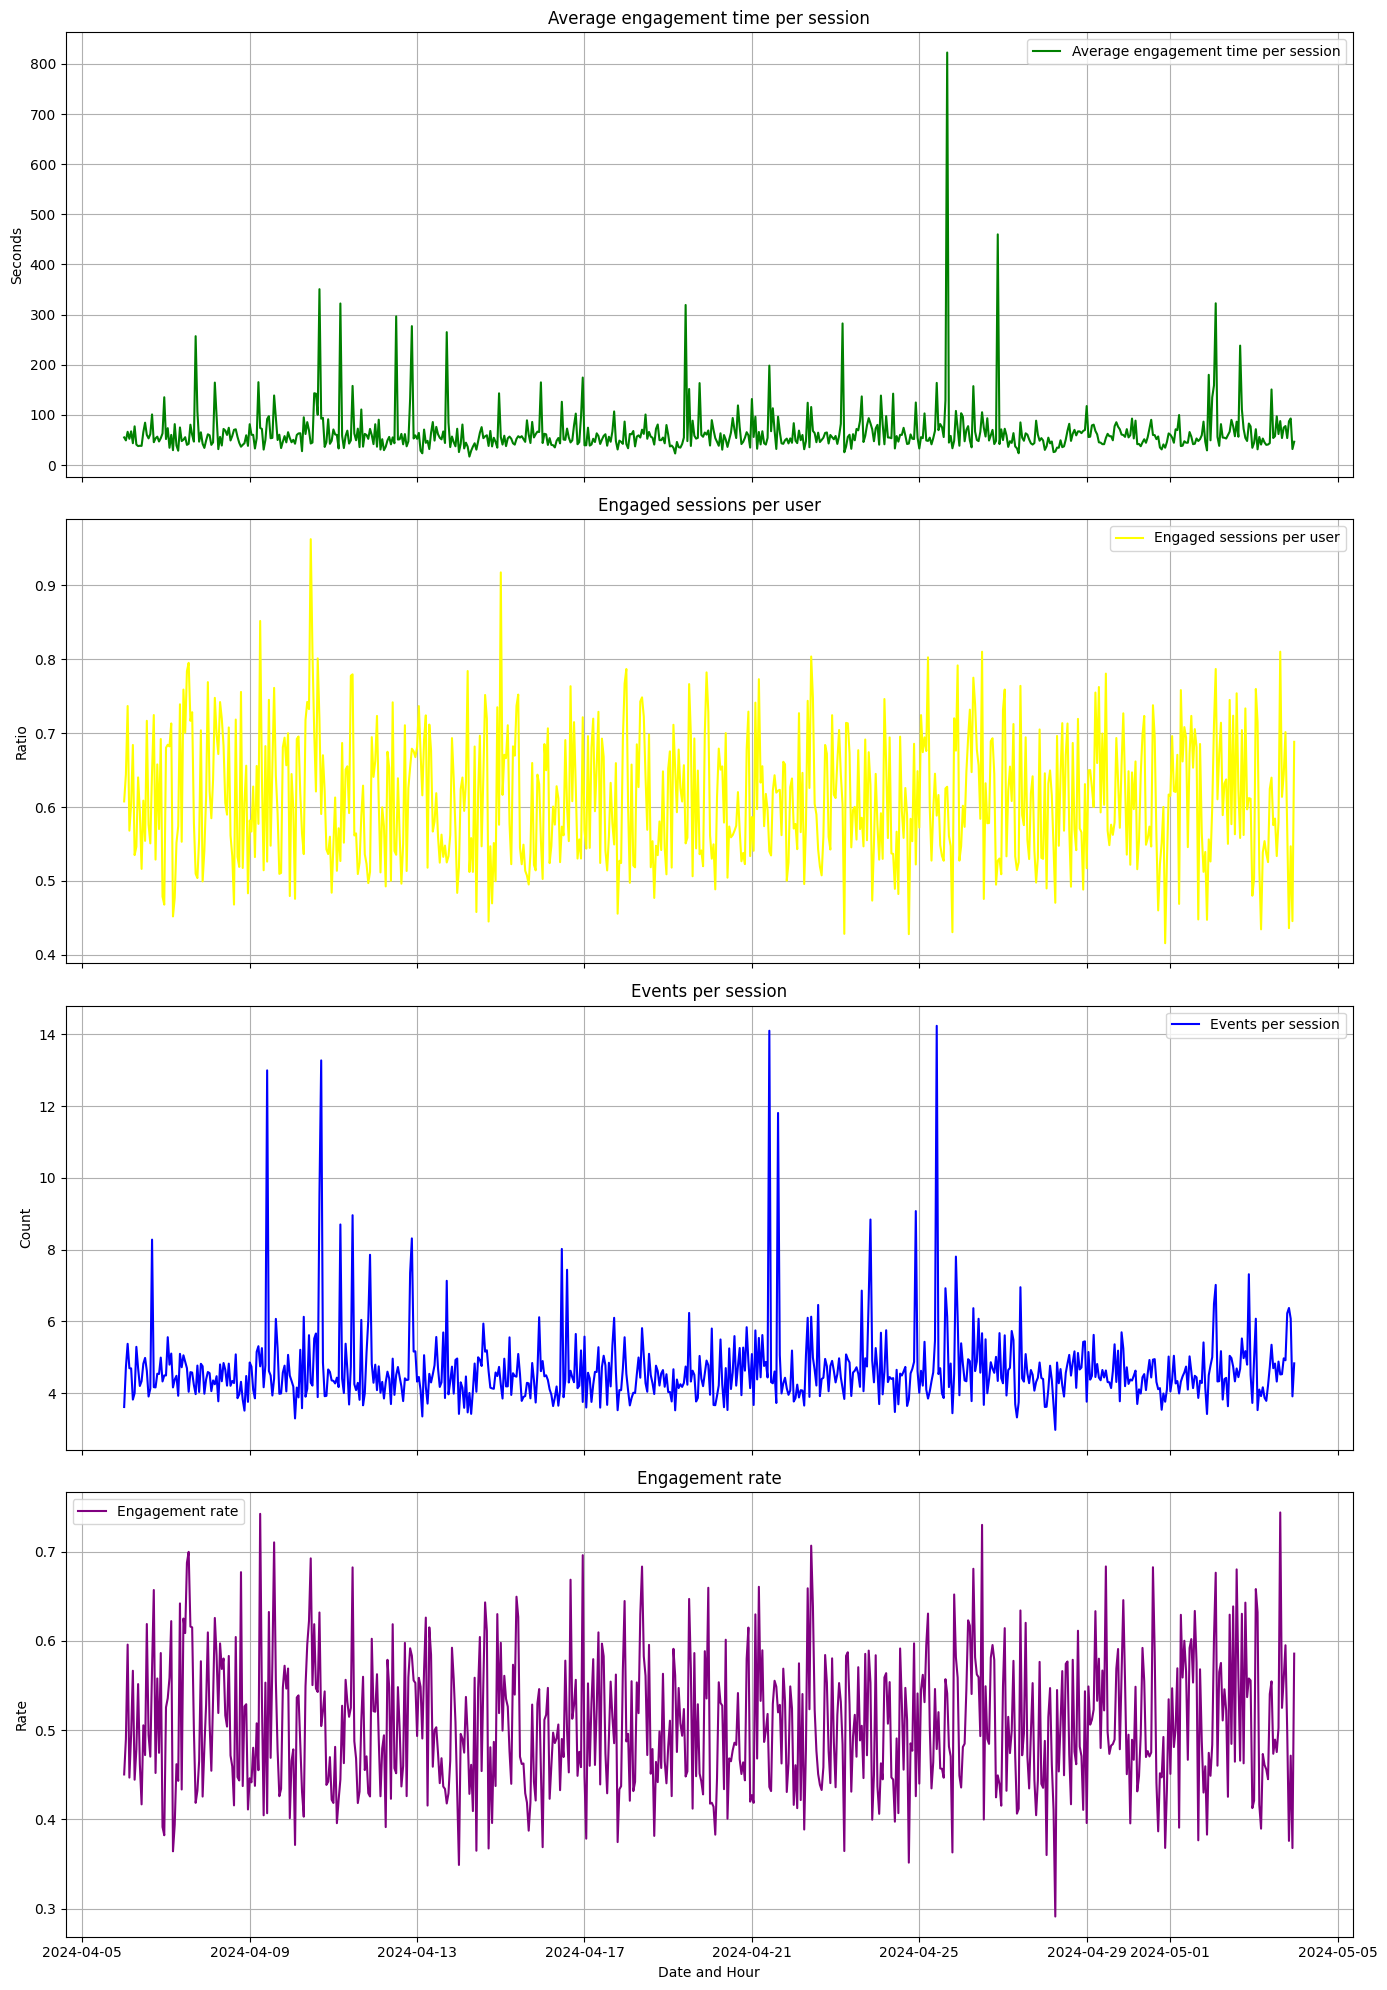

In [12]:
fig,ax = plt.subplots(4,1,figsize=(14,20),sharex = True)
colors = ["green","yellow","blue","purple"]
ylabel = ["Seconds","Ratio","Count","Rate"]
x = 0
for col in engagement_metrics.columns.tolist():
    ax[x].plot(engagement_metrics.index,engagement_metrics[col],label = f"{col}",color= colors[x])
    ax[x].set_title(f"{col}")
    ax[x].set_ylabel(ylabel[x])
    if x ==3:
        ax[x].set_xlabel("Date and Hour")
    x += 1
for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

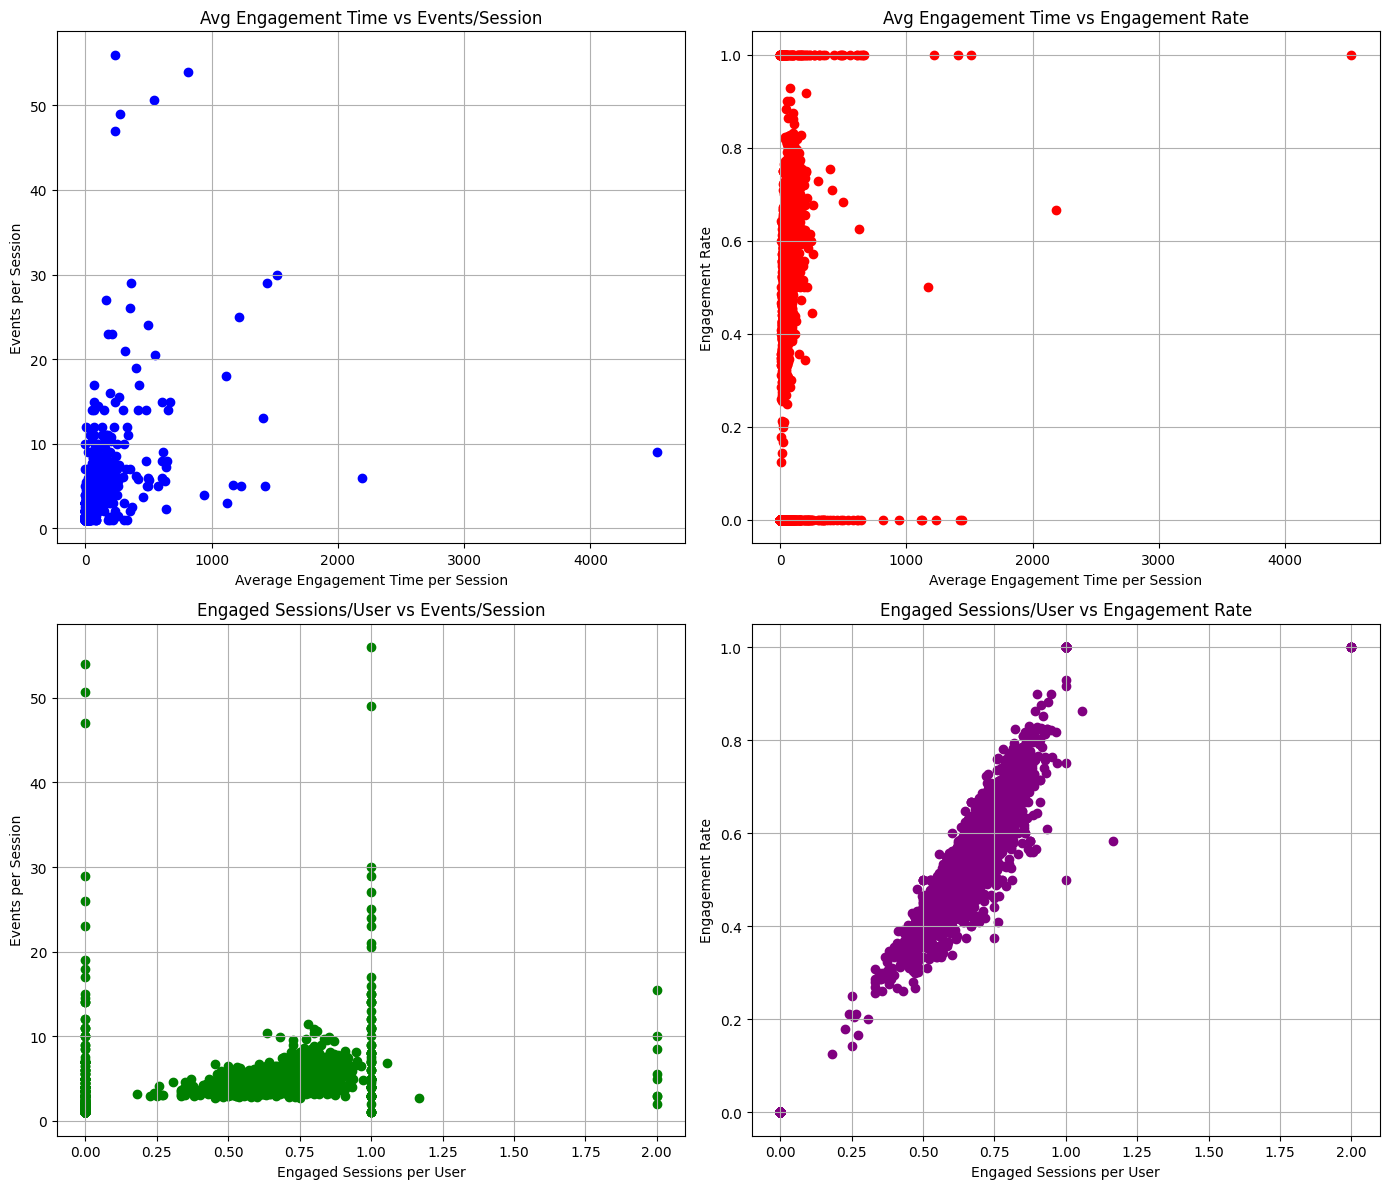

In [13]:
fig,axes = plt.subplots(2,2,figsize = (14,12))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

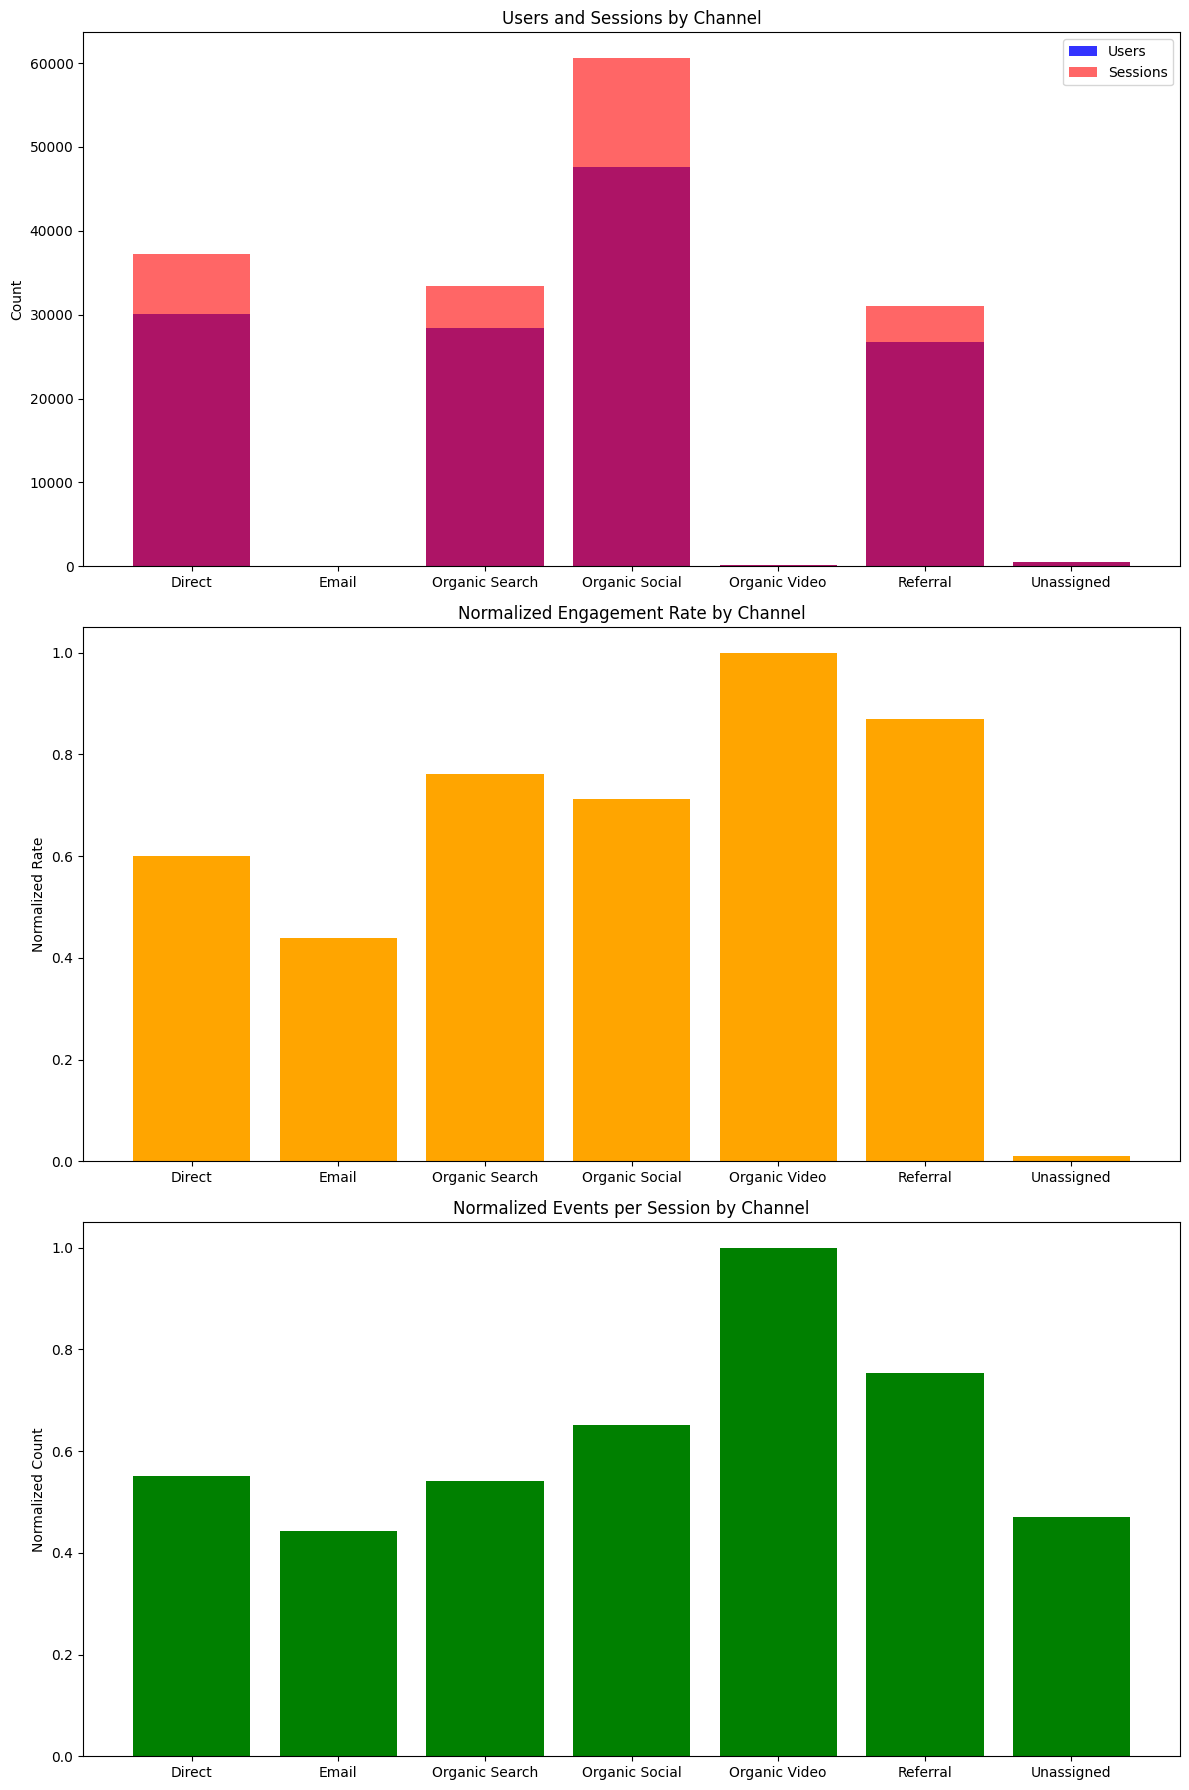

In [15]:
channel_performance = data.groupby("Session primary channel group (Default channel group)").agg({'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users',color="blue", alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', color= "red",alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()